In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_csv("./datas/Netflix TV Shows and Movies.csv")

In [3]:
df.head(2)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0


In [4]:
df.shape

(5283, 11)

In [5]:
#TYPE에는 어떤 종류가 있을까?
df['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [7]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [8]:
# 필요 없는 열 drop
df = df.drop(['imdb_id'], axis=1)

In [9]:
df.head(4)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0


In [10]:
df.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [11]:
# 나이제한 고유값 확인
age_unique = df['age_certification'].unique()
age_unique

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [24]:
type_count = df['type'].value_counts()
type_count

type
MOVIE    3407
SHOW     1876
Name: count, dtype: int64

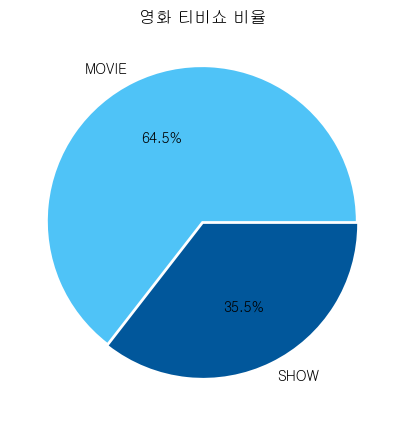

In [13]:
# 영화와 무비의 비율

plt.figure(figsize=(8, 5))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', 
        explode=[0.01, 0.01], colors=['#4FC3F7', '#01579B'])
plt.title("영화 티비쇼 비율")
plt.show()

In [14]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [15]:
df['release_year'].isnull().sum()

np.int64(0)

In [51]:
import numpy as np

np.sort(df['release_year'].unique())

array([1953, 1954, 1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1966,
       1967, 1968, 1969, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

Text(0, 0.5, 'num of contents')

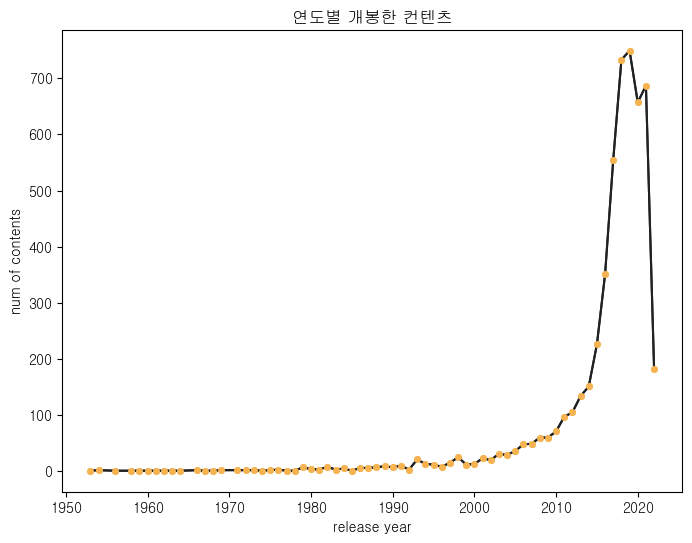

In [44]:
release_year_contents = df.groupby('release_year').size()
plt.figure(figsize=(8, 6))
# 연도별 개봉한 무비 티비쇼 차트
plt.plot(release_year_contents.index, release_year_contents.values, release_year_contents, color="#1F2124",
         marker='o', markersize=4, markerfacecolor='#F6B352', markeredgecolor='#F6B352')
plt.title("연도별 개봉한 컨텐츠")
plt.xlabel("release year")
plt.ylabel("num of contents")

K-mean를 사용한 군집화를 통해 넷플릭스가 주력할만한 군집을 찾고 특징을 분석해 인사이트를 도출

In [52]:
df_kmean = df[['release_year', 'runtime', 'imdb_score']]

In [ ]:
# 개봉 년도, 런타임, 평점으로 구분
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns


scaler = MinMaxScaler()
df_kmeans_scaler = scaler.fit_transform(df_kmean)
df_kmeans_scaler = pd.DataFrame(df_kmeans_scaler, columns=df_kmean.columns, index=df_kmean.index)

df_kmeans_scaler

,release_year,runtime,imdb_score
0,0.333333,0.480851,0.839506
1,0.318841,0.387234,0.827160
2,0.376812,0.400000,0.802469
3,0.289855,0.565957,0.814815
4,0.231884,0.127660,0.901235
...,...,...,...
5278,0.985507,0.459574,0.530864
5279,0.985507,0.425532,0.666667
5280,0.985507,0.374468,0.617284
5281,0.985507,0.493617,0.580247


In [54]:
k = 6

kmeans = KMeans(n_clusters=k, random_state=10)

kmeans.fit(df_kmeans_scaler)

KMeans(n_clusters=6, random_state=10)

In [55]:
df_kmeans_scaler['cluster'] = kmeans.fit_predict(df_kmeans_scaler)

In [56]:
df_kmeans_scaler

,release_year,runtime,imdb_score,cluster
0,0.333333,0.480851,0.839506,2
1,0.318841,0.387234,0.827160,2
2,0.376812,0.400000,0.802469,2
3,0.289855,0.565957,0.814815,2
4,0.231884,0.127660,0.901235,2
...,...,...,...,...
5278,0.985507,0.459574,0.530864,5
5279,0.985507,0.425532,0.666667,3
5280,0.985507,0.374468,0.617284,5
5281,0.985507,0.493617,0.580247,5


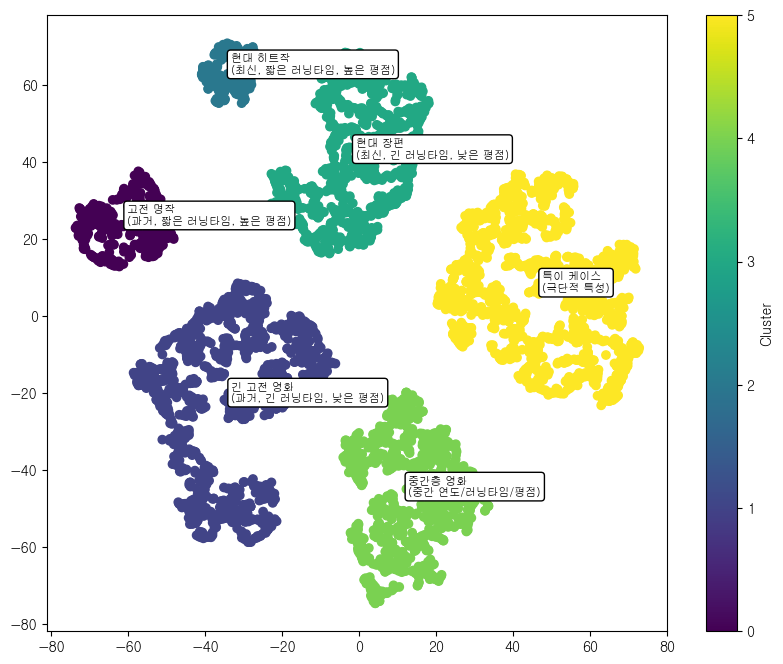

In [57]:
# pca와 t-SNE를 활용해 차원 축소 -> 표에 표현
plt.figure(figsize=(10, 8))

tsne = TSNE(n_components=2, random_state=85)
df_kmeans_tsne = pd.DataFrame(tsne.fit_transform(df_kmeans_scaler))
scatter = plt.scatter(
    df_kmeans_tsne[0], 
    df_kmeans_tsne[1],
    c = df_kmeans_scaler['cluster'],
    cmap = 'viridis',
)

for k in range(6):
    mask = df_kmeans_scaler['cluster'] == k
    center_x = df_kmeans_tsne[mask][0].mean()
    center_y = df_kmeans_tsne[mask][1].mean()
    
    # 군집별 특성 설명
    cluster_desc = {
        0: "고전 명작\n(과거, 짧은 러닝타임, 높은 평점)",
        1: "긴 고전 영화\n(과거, 긴 러닝타임, 낮은 평점)",
        2: "현대 히트작\n(최신, 짧은 러닝타임, 높은 평점)",
        3: "현대 장편\n(최신, 긴 러닝타임, 낮은 평점)",
        4: "중간층 영화\n(중간 연도/러닝타임/평점)",
        5: "특이 케이스\n(극단적 특성)"
    }
    
    # 레이블 추가
    plt.annotate(f'{cluster_desc[k]}', 
                (center_x, center_y),
                bbox=dict(boxstyle='round,pad=0.3', fc='white'),
                fontsize=8)
plt.colorbar(scatter, label="Cluster")
plt.show()


1. 과거 영화 그룹 (낮은 release_year)

Cluster 0: "고전 명작"
- 낮은 release_year (과거)
- 짧은 runtime
- 높은 imdb_score

Cluster 1: "긴 고전 영화"
- 낮은 release_year (과거)
- 긴 runtime
- 낮은 imdb_score

2. 최신 영화 그룹 (높은 release_year)
Cluster 2: "현대 히트작"
- 높은 release_year (최신)
- 짧은 runtime
- 높은 imdb_score

Cluster 3: "현대 장편"
- 높은 release_year (최신)
- 긴 runtime
- 낮은 imdb_score

3. 중간 특성 그룹:
Cluster 4: "중간층 영화"
- 중간 정도 release_year
- 중간 정도 runtime
- 중간 정도 imdb_score

Cluster 5: "특이 케이스"
- 극단적인 특성을 가진 영화들
- 매우 높거나 낮은 값들의 조합